<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-03 15:30:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-09-03 15:30:21 (6.76 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


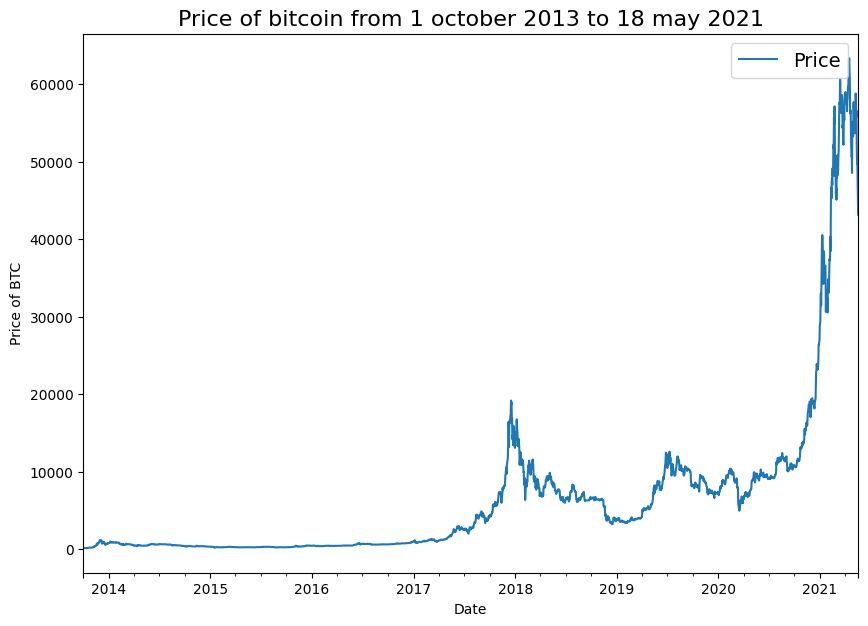

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

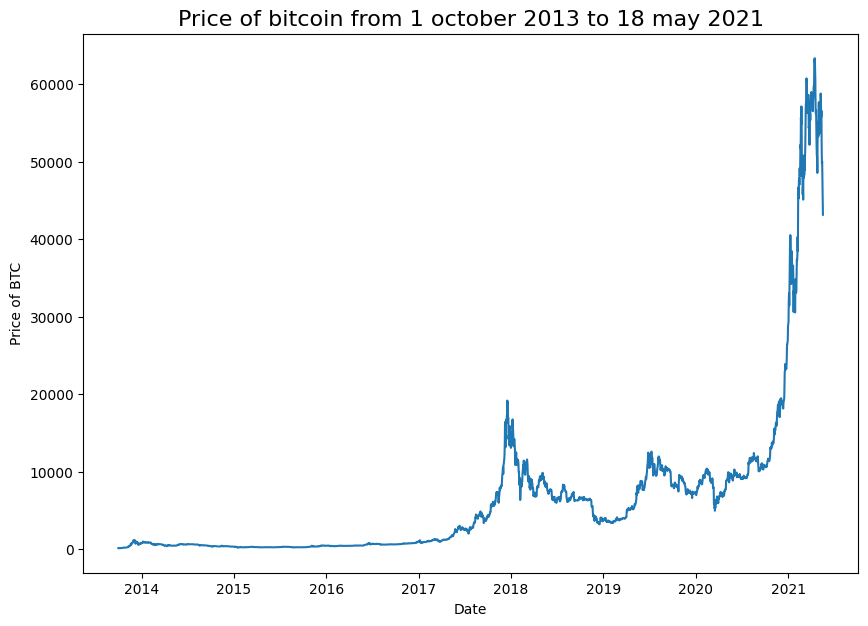

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

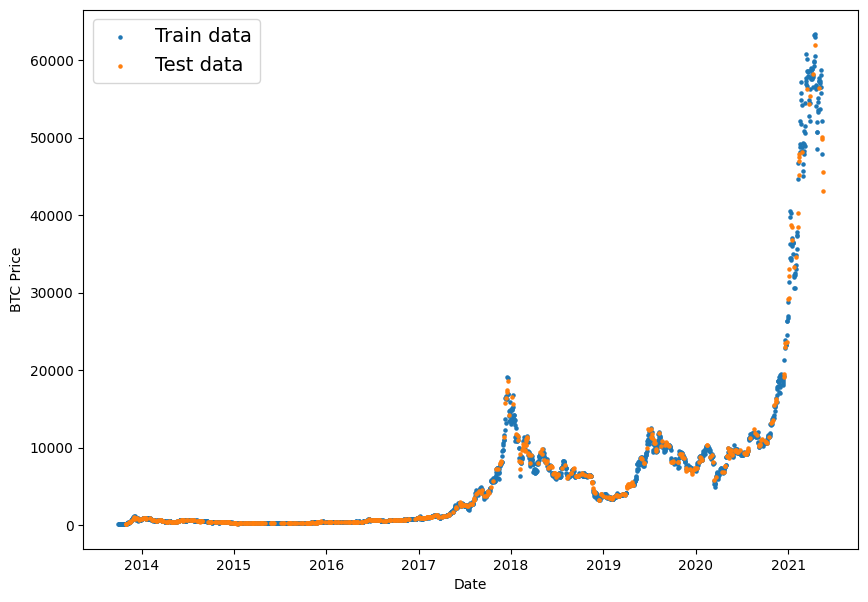

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

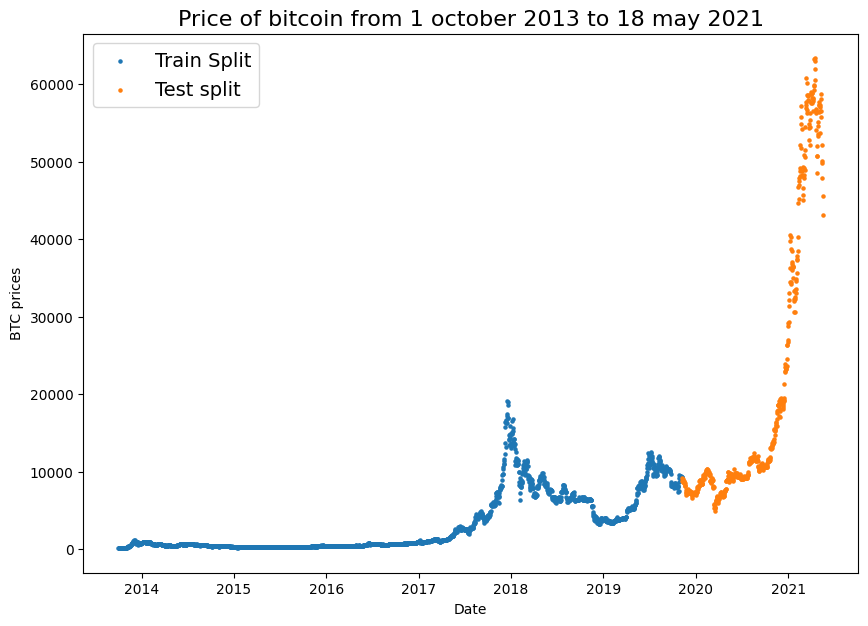

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


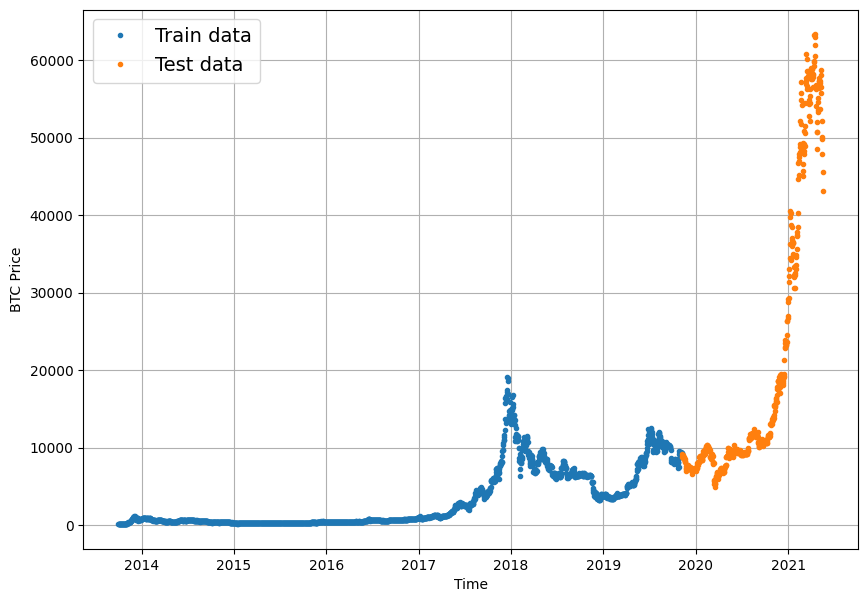

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

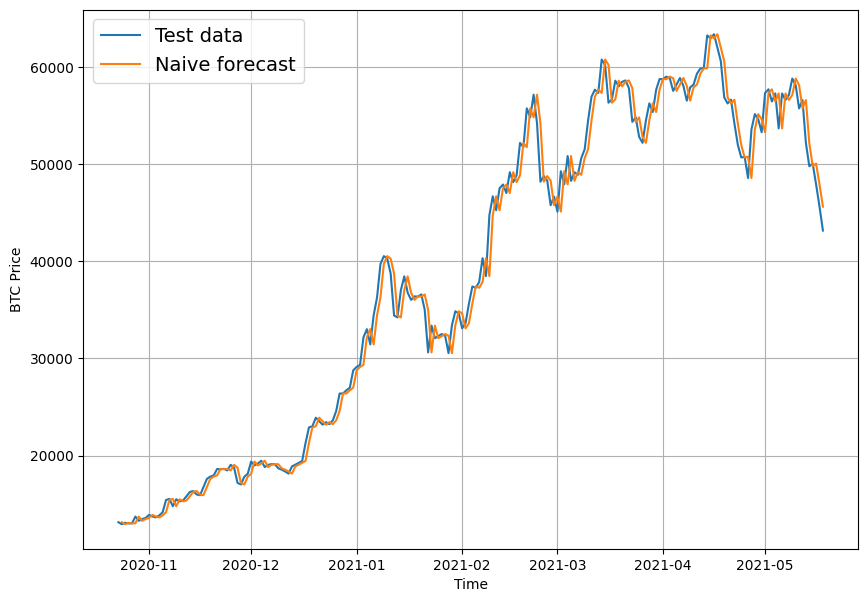

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 2674.8760 - mae: 2674.8760  

18/18 [==============================] - 7s 163ms/step - loss: 1786.0331 - mae: 1786.0331 - val_loss: 2013.7281 - val_mae: 2013.7281
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 415.4336 - mae: 415.4336 - val_loss: 2115.5249 - val_mae: 2115.5249
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 261.9703 - mae: 261.9703

18/18 [==============================] - 2s 100ms/step - loss: 251.1914 - mae: 251.1914 - val_loss: 1426.9901 - val_mae: 1426.9901
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 210.8103 - mae: 210.8103

18/18 [==============================] - 3s 176ms/step - loss: 210.8103 - mae: 210.8103 - val_loss: 1202.2720 - val_mae: 1202.2720
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 210.3117 - mae: 210.3117

18/18 [==============================] - 2s 114ms/step - loss: 202.7683 - mae: 202.7683 - val_loss: 1119.2406 - val_mae: 1119.2406
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 194.7455 - mae: 194.7455

18/18 [==============================] - 1s 82ms/step - loss: 196.3531 - mae: 196.3531 - val_loss: 1093.2313 - val_mae: 1093.2313
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 205.8301 - mae: 205.8301

18/18 [==============================] - 2s 93ms/step - loss: 186.2626 - mae: 186.2626 - val_loss: 1059.5709 - val_mae: 1059.5709
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 175.4941 - mae: 175.4941

18/18 [==============================] - 2s 92ms/step - loss: 179.2396 - mae: 179.2396 - val_loss: 965.4766 - val_mae: 965.4766
Epoch 9/100
18/18 [==============================] - 0s 15ms/step - loss: 169.7146 - mae: 169.7146 - val_loss: 977.1697 - val_mae: 977.1697
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 159.6946 - mae: 159.6946

18/18 [==============================] - 3s 160ms/step - loss: 163.7603 - mae: 163.7603 - val_loss: 886.1122 - val_mae: 886.1122
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 156.1642 - mae: 156.1642

18/18 [==============================] - 3s 162ms/step - loss: 156.1642 - mae: 156.1642 - val_loss: 862.1894 - val_mae: 862.1894
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 150.0511 - mae: 150.0511

18/18 [==============================] - 3s 147ms/step - loss: 149.8785 - mae: 149.8785 - val_loss: 858.8528 - val_mae: 858.8528
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 148.4626 - mae: 148.4626 - val_loss: 916.3347 - val_mae: 916.3347
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 143.8568 - mae: 143.8568

18/18 [==============================] - 2s 101ms/step - loss: 143.8568 - mae: 143.8568 - val_loss: 845.0290 - val_mae: 845.0290
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 140.2076 - mae: 140.2076

18/18 [==============================] - 2s 99ms/step - loss: 140.2294 - mae: 140.2294 - val_loss: 773.4235 - val_mae: 773.4235
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 136.3293 - mae: 136.3293

18/18 [==============================] - 1s 56ms/step - loss: 134.2564 - mae: 134.2564 - val_loss: 758.7226 - val_mae: 758.7226
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 129.7934 - mae: 129.7934

18/18 [==============================] - 1s 57ms/step - loss: 131.6659 - mae: 131.6659 - val_loss: 753.0996 - val_mae: 753.0996
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 130.5313 - mae: 130.5313 - val_loss: 753.2761 - val_mae: 753.2761
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 126.9532 - mae: 126.9532

18/18 [==============================] - 1s 55ms/step - loss: 126.2160 - mae: 126.2160 - val_loss: 714.9152 - val_mae: 714.9152
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 124.6095 - mae: 124.6095

18/18 [==============================] - 1s 78ms/step - loss: 124.6095 - mae: 124.6095 - val_loss: 683.1886 - val_mae: 683.1886
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 125.5044 - mae: 125.5044

18/18 [==============================] - 2s 104ms/step - loss: 126.4780 - mae: 126.4780 - val_loss: 678.4802 - val_mae: 678.4802
Epoch 22/100
18/18 [==============================] - 0s 15ms/step - loss: 121.9064 - mae: 121.9064 - val_loss: 688.4685 - val_mae: 688.4685
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 123.7909 - mae: 123.7909

18/18 [==============================] - 2s 92ms/step - loss: 124.6534 - mae: 124.6534 - val_loss: 655.1913 - val_mae: 655.1913
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 123.5867 - mae: 123.5867

18/18 [==============================] - 1s 48ms/step - loss: 121.6255 - mae: 121.6255 - val_loss: 645.1174 - val_mae: 645.1174
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1972 - mae: 126.1972

18/18 [==============================] - 1s 29ms/step - loss: 118.4798 - mae: 118.4798 - val_loss: 637.4905 - val_mae: 637.4905
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 115.0043 - mae: 115.0043

18/18 [==============================] - 0s 28ms/step - loss: 119.6185 - mae: 119.6185 - val_loss: 632.5607 - val_mae: 632.5607
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 120.9127 - mae: 120.9127

18/18 [==============================] - 1s 30ms/step - loss: 121.1254 - mae: 121.1254 - val_loss: 632.4064 - val_mae: 632.4064
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 105.8422 - mae: 105.8422

18/18 [==============================] - 1s 29ms/step - loss: 116.7337 - mae: 116.7337 - val_loss: 620.9013 - val_mae: 620.9013
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 115.0832 - mae: 115.0832

18/18 [==============================] - 1s 44ms/step - loss: 117.2510 - mae: 117.2510 - val_loss: 616.7855 - val_mae: 616.7855
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1049 - mae: 133.1049

18/18 [==============================] - 1s 29ms/step - loss: 119.8251 - mae: 119.8251 - val_loss: 615.2959 - val_mae: 615.2959
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5533 - mae: 120.5533

18/18 [==============================] - 1s 30ms/step - loss: 114.2074 - mae: 114.2074 - val_loss: 615.0834 - val_mae: 615.0834
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9084 - mae: 112.9084 - val_loss: 635.1857 - val_mae: 635.1857
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1151 - mae: 114.1151 - val_loss: 651.4830 - val_mae: 651.4830
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 143.9527 - mae: 143.9527

18/18 [==============================] - 1s 29ms/step - loss: 114.3120 - mae: 114.3120 - val_loss: 603.7506 - val_mae: 603.7506
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9251 - mae: 112.9251 - val_loss: 624.5020 - val_mae: 624.5020
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2407 - mae: 158.2407

18/18 [==============================] - 1s 30ms/step - loss: 114.7480 - mae: 114.7480 - val_loss: 603.0011 - val_mae: 603.0011
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1189 - mae: 112.1189 - val_loss: 610.7917 - val_mae: 610.7917
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.7845 - mae: 101.7845

18/18 [==============================] - 1s 29ms/step - loss: 112.7708 - mae: 112.7708 - val_loss: 595.6110 - val_mae: 595.6110
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7569 - mae: 113.7569 - val_loss: 625.6421 - val_mae: 625.6421
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1734 - mae: 111.1734 - val_loss: 598.9695 - val_mae: 598.9695
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8727 - mae: 112.8727 - val_loss: 604.9282 - val_mae: 604.9282
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4254 - mae: 115.4254 - val_loss: 733.0671 - val_mae: 733.0671
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4908 - mae: 128.4908 - val_loss: 613.1651 - val_mae: 613.1651
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 128.3909 - mae: 128.3909 - val_loss: 631.4714 - val_mae: 631.4714
Epoch 45/100
18/18 [============

18/18 [==============================] - 1s 29ms/step - loss: 112.0914 - mae: 112.0914 - val_loss: 585.7772 - val_mae: 585.7772
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2595 - mae: 118.2595

18/18 [==============================] - 1s 29ms/step - loss: 111.8809 - mae: 111.8809 - val_loss: 581.5965 - val_mae: 581.5965
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8684 - mae: 110.8684 - val_loss: 599.9415 - val_mae: 599.9415
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7542 - mae: 102.7542

18/18 [==============================] - 1s 29ms/step - loss: 109.1669 - mae: 109.1669 - val_loss: 581.2552 - val_mae: 581.2552
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6748 - mae: 109.6748 - val_loss: 583.1214 - val_mae: 583.1214
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3857 - mae: 108.3857 - val_loss: 746.6871 - val_mae: 746.6871
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5644 - mae: 113.5644 - val_loss: 589.5703 - val_mae: 589.5703
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 108.6709 - mae: 108.6709

18/18 [==============================] - 1s 43ms/step - loss: 108.3242 - mae: 108.3242 - val_loss: 579.8273 - val_mae: 579.8273
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 108.1035 - mae: 108.1035 - val_loss: 614.7336 - val_mae: 614.7336
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8755 - mae: 110.8755 - val_loss: 610.3304 - val_mae: 610.3304
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 111.1882 - mae: 111.1882

18/18 [==============================] - 1s 43ms/step - loss: 108.7507 - mae: 108.7507 - val_loss: 579.6405 - val_mae: 579.6405
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7191 - mae: 108.7191 - val_loss: 590.4509 - val_mae: 590.4509
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1301 - mae: 116.1301 - val_loss: 679.8530 - val_mae: 679.8530
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3819 - mae: 111.3819 - val_loss: 595.7241 - val_mae: 595.7241
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1775 - mae: 109.1775 - val_loss: 579.7678 - val_mae: 579.7678
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3111 - mae: 107.3111 - val_loss: 587.2822 - val_mae: 587.2822
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8591 - mae: 108.8591 - val_loss: 659.4761 - val_mae: 659.4761
Epoch 68/100
18/18 [============

18/18 [==============================] - 0s 29ms/step - loss: 111.8065 - mae: 111.8065 - val_loss: 577.5267 - val_mae: 577.5267
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9448 - mae: 109.9448 - val_loss: 577.5674 - val_mae: 577.5674
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4544 - mae: 111.4544 - val_loss: 607.1828 - val_mae: 607.1828
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5349 - mae: 111.5349 - val_loss: 579.9483 - val_mae: 579.9483
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7638 - mae: 110.7638 - val_loss: 585.2766 - val_mae: 585.2766
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 85.8118 - mae: 85.8118

18/18 [==============================] - 1s 29ms/step - loss: 109.0792 - mae: 109.0792 - val_loss: 577.4642 - val_mae: 577.4642
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5664 - mae: 110.5664 - val_loss: 601.7648 - val_mae: 601.7648
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1952 - mae: 110.1952 - val_loss: 578.8964 - val_mae: 578.8964
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3480 - mae: 108.3480 - val_loss: 583.4940 - val_mae: 583.4940
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8883 - mae: 105.8883 - val_loss: 581.4759 - val_mae: 581.4759
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 189.5664 - mae: 189.5664

18/18 [==============================] - 1s 30ms/step - loss: 117.7710 - mae: 117.7710 - val_loss: 575.6810 - val_mae: 575.6810
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5095 - mae: 114.5095 - val_loss: 688.6895 - val_mae: 688.6895
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5196 - mae: 114.5196 - val_loss: 589.6480 - val_mae: 589.6480
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7674 - mae: 108.7674 - val_loss: 576.8256 - val_mae: 576.8256
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7957 - mae: 105.7957 - val_loss: 585.7570 - val_mae: 585.7570
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0025 - mae: 106.0025 - val_loss: 650.1672 - val_mae: 650.1672
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9214 - mae: 110.9214 - val_loss: 576.8696 - val_mae: 576.8696
Epoch 89/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 107.7024 - mae: 107.7024 - val_loss: 572.8586 - val_mae: 572.8586
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 149.1034 - mae: 149.1034

18/18 [==============================] - 1s 45ms/step - loss: 109.1613 - mae: 109.1613 - val_loss: 571.6090 - val_mae: 571.6090
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1948 - mae: 110.1948 - val_loss: 582.0632 - val_mae: 582.0632


In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 582.0630 - mae: 582.0630


[582.0630493164062, 582.0630493164062]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 571.6091 - mae: 571.6091


[571.6090698242188, 571.6090698242188]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 2ms/step


array([[ 8866.891 ],
       [ 8761.46  ],
       [ 9039.918 ],
       [ 8788.435 ],
       [ 8710.981 ],
       [ 8745.893 ],
       [ 8710.985 ],
       [ 8494.798 ],
       [ 8469.23  ],
       [ 8532.198 ],
       [ 8259.741 ],
       [ 8101.925 ],
       [ 8064.0693],
       [ 7684.757 ],
       [ 7311.907 ],
       [ 7263.807 ],
       [ 7093.5283],
       [ 7166.4927],
       [ 7135.615 ],
       [ 7491.086 ],
       [ 7420.744 ],
       [ 7718.203 ],
       [ 7593.0195],
       [ 7444.6816],
       [ 7314.068 ],
       [ 7344.54  ],
       [ 7221.585 ],
       [ 7362.907 ],
       [ 7514.6436],
       [ 7557.173 ],
       [ 7556.6567],
       [ 7388.331 ],
       [ 7252.8066],
       [ 7196.936 ],
       [ 7198.49  ],
       [ 7222.6914],
       [ 7112.871 ],
       [ 7105.3286],
       [ 6917.583 ],
       [ 6617.625 ],
       [ 7276.0073],
       [ 7250.0845],
       [ 7145.5303],
       [ 7230.3613],
       [ 7335.9805],
       [ 7169.0693],
       [ 7225.556 ],
       [ 7242

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 571.6091,
 'mse': 1178080.0,
 'rmse': 1085.3939,
 'mape': 2.5614326,
 'mase': 1.0041589}

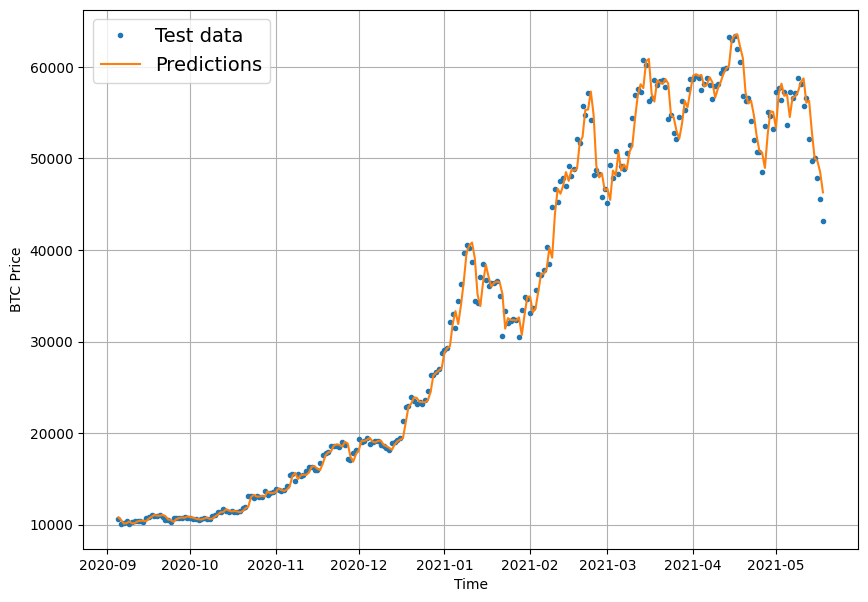

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1604.4685 - mae: 1604.4685 

18/18 [==============================] - 2s 40ms/step - loss: 1604.4685 - mae: 1604.4685 - val_loss: 2058.0312 - val_mae: 2058.0312
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 391.3337 - mae: 391.3337

18/18 [==============================] - 1s 30ms/step - loss: 404.2843 - mae: 404.2843 - val_loss: 2041.5911 - val_mae: 2041.5911
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 281.5825 - mae: 281.5825

18/18 [==============================] - 1s 31ms/step - loss: 281.5825 - mae: 281.5825 - val_loss: 1443.5164 - val_mae: 1443.5164
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 208.1118 - mae: 208.1118

18/18 [==============================] - 1s 35ms/step - loss: 242.1918 - mae: 242.1918 - val_loss: 1247.0560 - val_mae: 1247.0560
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 215.2810 - mae: 215.2810

18/18 [==============================] - 1s 46ms/step - loss: 221.7766 - mae: 221.7766 - val_loss: 1212.3763 - val_mae: 1212.3763
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 222.9836 - mae: 222.9836 - val_loss: 1504.6165 - val_mae: 1504.6165
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 237.8283 - mae: 237.8283

18/18 [==============================] - 1s 45ms/step - loss: 205.3279 - mae: 205.3279 - val_loss: 1096.5365 - val_mae: 1096.5365
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 205.2064 - mae: 205.2064

18/18 [==============================] - 1s 37ms/step - loss: 189.9642 - mae: 189.9642 - val_loss: 1044.5096 - val_mae: 1044.5096
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 183.9293 - mae: 183.9293 - val_loss: 1119.2585 - val_mae: 1119.2585
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 255.1470 - mae: 255.1470

18/18 [==============================] - 1s 33ms/step - loss: 187.6335 - mae: 187.6335 - val_loss: 989.6318 - val_mae: 989.6318
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 174.0317 - mae: 174.0317 - val_loss: 1029.0979 - val_mae: 1029.0979
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 170.8577 - mae: 170.8577

18/18 [==============================] - 1s 76ms/step - loss: 170.2164 - mae: 170.2164 - val_loss: 947.3204 - val_mae: 947.3204
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 168.8077 - mae: 168.8077

18/18 [==============================] - 2s 102ms/step - loss: 169.9469 - mae: 169.9469 - val_loss: 899.0153 - val_mae: 899.0153
Epoch 14/100
18/18 [==============================] - 0s 16ms/step - loss: 161.4976 - mae: 161.4976 - val_loss: 903.2159 - val_mae: 903.2159
Epoch 15/100
18/18 [==============================] - 0s 11ms/step - loss: 162.0776 - mae: 162.0776 - val_loss: 1175.8088 - val_mae: 1175.8088
Epoch 16/100
10/18 [===============>..............] - ETA: 0s - loss: 172.6662 - mae: 172.6662

18/18 [==============================] - 2s 113ms/step - loss: 170.0219 - mae: 170.0219 - val_loss: 838.0330 - val_mae: 838.0330
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 151.9710 - mae: 151.9710

18/18 [==============================] - 1s 62ms/step - loss: 151.3531 - mae: 151.3531 - val_loss: 813.2418 - val_mae: 813.2418
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 172.2718 - mae: 172.2718

18/18 [==============================] - 1s 30ms/step - loss: 152.2709 - mae: 152.2709 - val_loss: 796.3629 - val_mae: 796.3629
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 153.0135 - mae: 153.0135 - val_loss: 1251.6814 - val_mae: 1251.6814
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 207.9418 - mae: 207.9418

18/18 [==============================] - 1s 29ms/step - loss: 168.4630 - mae: 168.4630 - val_loss: 771.1613 - val_mae: 771.1613
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 162.4148 - mae: 162.4148 - val_loss: 796.3225 - val_mae: 796.3225
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 137.4588 - mae: 137.4588 - val_loss: 899.5637 - val_mae: 899.5637
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 153.6292 - mae: 153.6292 - val_loss: 1366.6923 - val_mae: 1366.6923
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 245.9953 - mae: 245.9953

18/18 [==============================] - 1s 30ms/step - loss: 159.9624 - mae: 159.9624 - val_loss: 736.7485 - val_mae: 736.7485
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 144.3468 - mae: 144.3468 - val_loss: 844.7814 - val_mae: 844.7814
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 134.9756 - mae: 134.9756 - val_loss: 908.4443 - val_mae: 908.4443
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 156.0341 - mae: 156.0341 - val_loss: 841.9811 - val_mae: 841.9811
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5029 - mae: 135.5029 - val_loss: 1060.5100 - val_mae: 1060.5100
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 215.9620 - mae: 215.9620

18/18 [==============================] - 1s 30ms/step - loss: 150.2547 - mae: 150.2547 - val_loss: 713.7552 - val_mae: 713.7552
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 136.5524 - mae: 136.5524 - val_loss: 764.1588 - val_mae: 764.1588
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 152.6904 - mae: 152.6904

18/18 [==============================] - 1s 30ms/step - loss: 153.3533 - mae: 153.3533 - val_loss: 702.4444 - val_mae: 702.4444
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 135.0236 - mae: 135.0236 - val_loss: 828.6261 - val_mae: 828.6261
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 136.4661 - mae: 136.4661 - val_loss: 709.7407 - val_mae: 709.7407
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 129.1538 - mae: 129.1538 - val_loss: 722.0418 - val_mae: 722.0418
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 153.8016 - mae: 153.8016

18/18 [==============================] - 1s 29ms/step - loss: 139.8482 - mae: 139.8482 - val_loss: 696.1022 - val_mae: 696.1022
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 131.4957 - mae: 131.4957 - val_loss: 712.2925 - val_mae: 712.2925
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 137.9160 - mae: 137.9160 - val_loss: 1013.4657 - val_mae: 1013.4657
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 181.2023 - mae: 181.2023 - val_loss: 1124.6169 - val_mae: 1124.6169
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 144.6392 - mae: 144.6392 - val_loss: 785.6005 - val_mae: 785.6005
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 130.9788 - mae: 130.9788 - val_loss: 830.9334 - val_mae: 830.9334
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4302 - mae: 114.4302

18/18 [==============================] - 1s 30ms/step - loss: 129.1290 - mae: 129.1290 - val_loss: 688.3546 - val_mae: 688.3546
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 116.3858 - mae: 116.3858

18/18 [==============================] - 1s 30ms/step - loss: 128.4778 - mae: 128.4778 - val_loss: 683.9212 - val_mae: 683.9212
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 128.2744 - mae: 128.2744 - val_loss: 730.2307 - val_mae: 730.2307
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 146.6904 - mae: 146.6904 - val_loss: 726.5120 - val_mae: 726.5120
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 145.8809 - mae: 145.8809 - val_loss: 760.1969 - val_mae: 760.1969
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0463 - mae: 126.0463

18/18 [==============================] - 1s 29ms/step - loss: 134.8530 - mae: 134.8530 - val_loss: 664.0801 - val_mae: 664.0801
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 126.0987 - mae: 126.0987 - val_loss: 670.2536 - val_mae: 670.2536
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 123.6183 - mae: 123.6183 - val_loss: 665.2856 - val_mae: 665.2856
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7670 - mae: 124.7670 - val_loss: 683.5417 - val_mae: 683.5417
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 137.8210 - mae: 137.8210 - val_loss: 939.0504 - val_mae: 939.0504
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 131.8142 - mae: 131.8142 - val_loss: 907.7097 - val_mae: 907.7097
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 131.5308 - mae: 131.5308 - val_loss: 766.5123 - val_mae: 766.5123
Epoch 53/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 154.7811 - mae: 154.7811 - val_loss: 657.6931 - val_mae: 657.6931
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 141.5357 - mae: 141.5357 - val_loss: 970.2414 - val_mae: 970.2414
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 135.5007 - mae: 135.5007 - val_loss: 832.2126 - val_mae: 832.2126
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 128.7138 - mae: 128.7138 - val_loss: 690.2137 - val_mae: 690.2137
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 122.6207 - mae: 122.6207 - val_loss: 680.5615 - val_mae: 680.5615
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 92.0141 - mae: 92.0141

18/18 [==============================] - 0s 29ms/step - loss: 119.5180 - mae: 119.5180 - val_loss: 649.9304 - val_mae: 649.9304
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 124.5799 - mae: 124.5799

18/18 [==============================] - 1s 30ms/step - loss: 124.6921 - mae: 124.6921 - val_loss: 642.8684 - val_mae: 642.8684
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9833 - mae: 119.9833 - val_loss: 649.8136 - val_mae: 649.8136
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8458 - mae: 120.8458 - val_loss: 645.7919 - val_mae: 645.7919
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 78.4915 - mae: 78.4915

18/18 [==============================] - 1s 37ms/step - loss: 126.9084 - mae: 126.9084 - val_loss: 638.4264 - val_mae: 638.4264
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 119.8931 - mae: 119.8931 - val_loss: 1035.7274 - val_mae: 1035.7274
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 148.9882 - mae: 148.9882 - val_loss: 701.6389 - val_mae: 701.6389
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 129.2737 - mae: 129.2737 - val_loss: 644.5446 - val_mae: 644.5446
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1671 - mae: 121.1671 - val_loss: 646.4757 - val_mae: 646.4757
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2913 - mae: 122.2913 - val_loss: 640.3781 - val_mae: 640.3781
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 122.3038 - mae: 122.3038 - val_loss: 673.2737 - val_mae: 673.2737
Epoch 75/100
18/18 [==========

18/18 [==============================] - 1s 44ms/step - loss: 138.3196 - mae: 138.3196 - val_loss: 634.6207 - val_mae: 634.6207
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 131.9800 - mae: 131.9800 - val_loss: 688.3827 - val_mae: 688.3827
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 127.5102 - mae: 127.5102 - val_loss: 669.6315 - val_mae: 669.6315
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9313 - mae: 117.9313 - val_loss: 637.3443 - val_mae: 637.3443
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 104.6164 - mae: 104.6164

18/18 [==============================] - 1s 45ms/step - loss: 122.1084 - mae: 122.1084 - val_loss: 630.7742 - val_mae: 630.7742
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 117.6278 - mae: 117.6278

18/18 [==============================] - 1s 49ms/step - loss: 117.7198 - mae: 117.7198 - val_loss: 630.0414 - val_mae: 630.0414
Epoch 83/100
18/18 [==============================] - 0s 11ms/step - loss: 118.9757 - mae: 118.9757 - val_loss: 643.1801 - val_mae: 643.1801
Epoch 84/100
18/18 [==============================] - 0s 15ms/step - loss: 122.2838 - mae: 122.2838 - val_loss: 770.5709 - val_mae: 770.5709
Epoch 85/100
18/18 [==============================] - 0s 14ms/step - loss: 122.1316 - mae: 122.1316 - val_loss: 782.9805 - val_mae: 782.9805
Epoch 86/100
18/18 [==============================] - 0s 21ms/step - loss: 121.8124 - mae: 121.8124 - val_loss: 683.1351 - val_mae: 683.1351
Epoch 87/100
18/18 [==============================] - 0s 17ms/step - loss: 132.0727 - mae: 132.0727 - val_loss: 760.3265 - val_mae: 760.3265
Epoch 88/100
18/18 [==============================] - 0s 13ms/step - loss: 123.7979 - mae: 123.7979 - val_loss: 694.5817 - val_mae: 694.5817
Epoch 89/100
18/18 [======

18/18 [==============================] - 1s 57ms/step - loss: 119.0671 - mae: 119.0671 - val_loss: 621.2160 - val_mae: 621.2160


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 621.2160 - mae: 621.2160


[621.2160034179688, 621.2160034179688]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 3ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 621.21594,
 'mse': 1311975.6,
 'rmse': 1145.415,
 'mape': 2.7914479,
 'mase': 1.0858916}

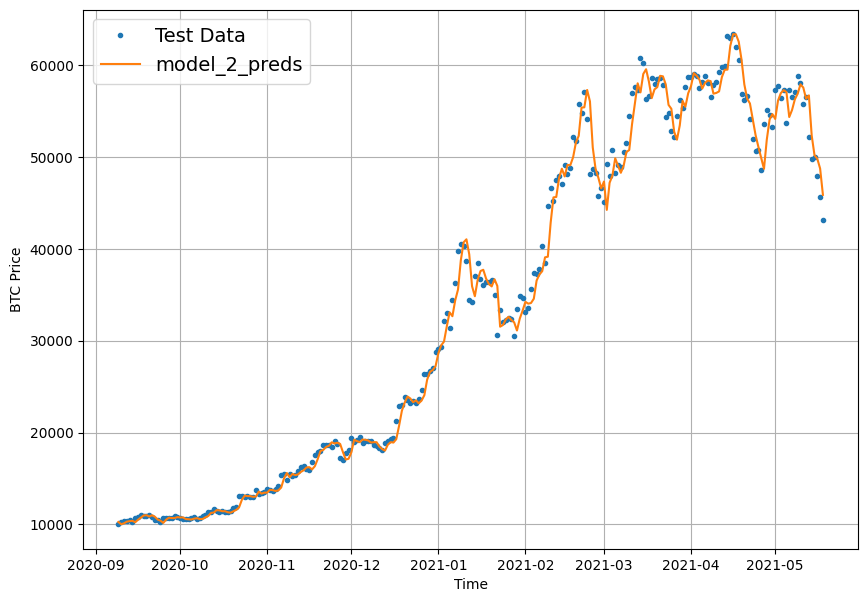

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1705.2256 - mae: 1705.2256

18/18 [==============================] - 3s 91ms/step - loss: 1633.2344 - mae: 1633.2344 - val_loss: 3072.1868 - val_mae: 3072.1868
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 566.6891 - mae: 566.6891

18/18 [==============================] - 1s 70ms/step - loss: 562.2407 - mae: 562.2407 - val_loss: 2706.1543 - val_mae: 2706.1543
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 467.4541 - mae: 467.4541

18/18 [==============================] - 1s 52ms/step - loss: 456.4181 - mae: 456.4181 - val_loss: 2355.0500 - val_mae: 2355.0500
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 413.9619 - mae: 413.9619

18/18 [==============================] - 2s 88ms/step - loss: 413.1806 - mae: 413.1806 - val_loss: 2189.3945 - val_mae: 2189.3945
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 381.3121 - mae: 381.3121 - val_loss: 2268.8704 - val_mae: 2268.8704
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 366.5616 - mae: 366.5616

18/18 [==============================] - 1s 73ms/step - loss: 358.5804 - mae: 358.5804 - val_loss: 1886.9905 - val_mae: 1886.9905
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 301.4601 - mae: 301.4601

18/18 [==============================] - 1s 57ms/step - loss: 331.7733 - mae: 331.7733 - val_loss: 1628.7087 - val_mae: 1628.7087
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 317.5723 - mae: 317.5723 - val_loss: 1657.2998 - val_mae: 1657.2998
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 303.4813 - mae: 303.4813 - val_loss: 1829.8751 - val_mae: 1829.8751
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 301.8600 - mae: 301.8600

18/18 [==============================] - 1s 79ms/step - loss: 303.6098 - mae: 303.6098 - val_loss: 1496.4243 - val_mae: 1496.4243
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 278.0706 - mae: 278.0706 - val_loss: 1498.3396 - val_mae: 1498.3396
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 274.4873 - mae: 274.4873 - val_loss: 1551.3256 - val_mae: 1551.3256
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 260.4211 - mae: 260.4211

18/18 [==============================] - 1s 42ms/step - loss: 267.8921 - mae: 267.8921 - val_loss: 1429.5150 - val_mae: 1429.5150
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 253.9128 - mae: 253.9128

18/18 [==============================] - 1s 59ms/step - loss: 265.4495 - mae: 265.4495 - val_loss: 1419.1720 - val_mae: 1419.1720
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 261.4462 - mae: 261.4462 - val_loss: 1539.2205 - val_mae: 1539.2205
Epoch 16/100
18/18 [==============================] - 0s 9ms/step - loss: 257.5780 - mae: 257.5780 - val_loss: 1462.0483 - val_mae: 1462.0483
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 256.6898 - mae: 256.6898 - val_loss: 1493.7366 - val_mae: 1493.7366
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 255.0366 - mae: 255.0366 - val_loss: 1568.2743 - val_mae: 1568.2743
Epoch 19/100
18/18 [==============================] - 0s 12ms/step - loss: 254.6035 - mae: 254.6035 - val_loss: 1524.7765 - val_mae: 1524.7765
Epoch 20/100
18/18 [==============================] - 0s 12ms/step - loss: 256.0265 - mae: 256.0265 - val_loss: 1457.6466 - val_mae: 1457.6466
Epoch 21/100
18/

18/18 [==============================] - 1s 68ms/step - loss: 251.1705 - mae: 251.1705 - val_loss: 1418.0640 - val_mae: 1418.0640
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 254.9456 - mae: 254.9456

18/18 [==============================] - 1s 53ms/step - loss: 253.1422 - mae: 253.1422 - val_loss: 1365.2081 - val_mae: 1365.2081
Epoch 24/100
18/18 [==============================] - 0s 11ms/step - loss: 260.5494 - mae: 260.5494 - val_loss: 1368.3079 - val_mae: 1368.3079
Epoch 25/100
18/18 [==============================] - 0s 12ms/step - loss: 249.1393 - mae: 249.1393 - val_loss: 1568.6068 - val_mae: 1568.6068
Epoch 26/100
18/18 [==============================] - 0s 13ms/step - loss: 248.4439 - mae: 248.4439 - val_loss: 1407.5571 - val_mae: 1407.5571
Epoch 27/100
18/18 [==============================] - 0s 14ms/step - loss: 242.0395 - mae: 242.0395 - val_loss: 1375.2847 - val_mae: 1375.2847
Epoch 28/100
18/18 [==============================] - 0s 9ms/step - loss: 241.0574 - mae: 241.0574 - val_loss: 1380.2651 - val_mae: 1380.2651
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 239.5303 - mae: 239.5303 - val_loss: 1376.4813 - val_mae: 1376.4813
Epoch 30/100
1

18/18 [==============================] - 1s 52ms/step - loss: 237.9502 - mae: 237.9502 - val_loss: 1354.6947 - val_mae: 1354.6947
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 222.2112 - mae: 222.2112

18/18 [==============================] - 1s 84ms/step - loss: 238.5881 - mae: 238.5881 - val_loss: 1340.0674 - val_mae: 1340.0674
Epoch 33/100
18/18 [==============================] - 0s 14ms/step - loss: 240.8919 - mae: 240.8919 - val_loss: 1384.4261 - val_mae: 1384.4261
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 238.5912 - mae: 238.5912 - val_loss: 1432.4683 - val_mae: 1432.4683
Epoch 35/100
18/18 [==============================] - 0s 11ms/step - loss: 242.5707 - mae: 242.5707 - val_loss: 1416.6622 - val_mae: 1416.6622
Epoch 36/100
18/18 [==============================] - 0s 10ms/step - loss: 238.1902 - mae: 238.1902 - val_loss: 1350.2433 - val_mae: 1350.2433
Epoch 37/100
18/18 [==============================] - 0s 10ms/step - loss: 250.2920 - mae: 250.2920 - val_loss: 1357.0267 - val_mae: 1357.0267
Epoch 38/100
18/18 [==============================] - 0s 11ms/step - loss: 234.0331 - mae: 234.0331 - val_loss: 1361.8348 - val_mae: 1361.8348
Epoch 39/100


18/18 [==============================] - 1s 37ms/step - loss: 237.1975 - mae: 237.1975 - val_loss: 1310.8043 - val_mae: 1310.8043
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 233.6654 - mae: 233.6654 - val_loss: 1344.6199 - val_mae: 1344.6199
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 238.9220 - mae: 238.9220 - val_loss: 1351.5214 - val_mae: 1351.5214
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 238.9798 - mae: 238.9798 - val_loss: 1574.6251 - val_mae: 1574.6251
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 253.1293 - mae: 253.1293

18/18 [==============================] - 1s 30ms/step - loss: 243.2212 - mae: 243.2212 - val_loss: 1309.5901 - val_mae: 1309.5901
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 235.5936 - mae: 235.5936 - val_loss: 1374.2141 - val_mae: 1374.2141
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 233.4321 - mae: 233.4321 - val_loss: 1315.4199 - val_mae: 1315.4199
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8849 - mae: 237.8849 - val_loss: 1348.1534 - val_mae: 1348.1534
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 232.1474 - mae: 232.1474 - val_loss: 1317.9941 - val_mae: 1317.9941
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 231.7145 - mae: 231.7145 - val_loss: 1486.2019 - val_mae: 1486.2019
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 168.3229 - mae: 168.3229

18/18 [==============================] - 1s 33ms/step - loss: 231.1230 - mae: 231.1230 - val_loss: 1296.0262 - val_mae: 1296.0262
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 176.5928 - mae: 176.5928

18/18 [==============================] - 0s 29ms/step - loss: 229.2920 - mae: 229.2920 - val_loss: 1276.1434 - val_mae: 1276.1434
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 230.1544 - mae: 230.1544 - val_loss: 1297.0316 - val_mae: 1297.0316
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 230.5659 - mae: 230.5659 - val_loss: 1315.4640 - val_mae: 1315.4640
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 233.1157 - mae: 233.1157 - val_loss: 1315.8512 - val_mae: 1315.8512
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 230.0462 - mae: 230.0462 - val_loss: 1322.2960 - val_mae: 1322.2960
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 227.6424 - mae: 227.6424 - val_loss: 1287.3311 - val_mae: 1287.3311
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 178.0754 - mae: 178.0754

18/18 [==============================] - 1s 29ms/step - loss: 229.0206 - mae: 229.0206 - val_loss: 1272.8325 - val_mae: 1272.8325
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 230.8197 - mae: 230.8197 - val_loss: 1294.0862 - val_mae: 1294.0862
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 225.1796 - mae: 225.1796 - val_loss: 1358.7292 - val_mae: 1358.7292
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 336.9193 - mae: 336.9193

18/18 [==============================] - 1s 42ms/step - loss: 231.6900 - mae: 231.6900 - val_loss: 1267.5435 - val_mae: 1267.5435
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 231.2950 - mae: 231.2950 - val_loss: 1421.7106 - val_mae: 1421.7106
Epoch 64/100
16/18 [=========================>....] - ETA: 0s - loss: 237.0982 - mae: 237.0982

18/18 [==============================] - 1s 43ms/step - loss: 231.1948 - mae: 231.1948 - val_loss: 1256.5088 - val_mae: 1256.5088
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 228.3566 - mae: 228.3566 - val_loss: 1301.0524 - val_mae: 1301.0524
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 226.5785 - mae: 226.5785 - val_loss: 1452.9556 - val_mae: 1452.9556
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 233.1823 - mae: 233.1823 - val_loss: 1317.1449 - val_mae: 1317.1449
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 228.3010 - mae: 228.3010 - val_loss: 1294.5105 - val_mae: 1294.5105
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 225.7087 - mae: 225.7087 - val_loss: 1578.9810 - val_mae: 1578.9810
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 232.0098 - mae: 232.0098 - val_loss: 1260.0686 - val_mae: 1260.0686
Epoch 71/100
18/18

18/18 [==============================] - 1s 29ms/step - loss: 222.4404 - mae: 222.4404 - val_loss: 1244.8372 - val_mae: 1244.8372
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 226.4344 - mae: 226.4344 - val_loss: 1369.1140 - val_mae: 1369.1140
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 225.6603 - mae: 225.6603 - val_loss: 1334.8060 - val_mae: 1334.8060
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4462 - mae: 226.4462 - val_loss: 1270.6302 - val_mae: 1270.6302
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 226.0011 - mae: 226.0011 - val_loss: 1351.0695 - val_mae: 1351.0695
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 222.9576 - mae: 222.9576 - val_loss: 1351.7524 - val_mae: 1351.7524
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 224.1233 - mae: 224.1233 - val_loss: 1245.5460 - val_mae: 1245.5460
Epoch 99/100
18/18

In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1244.8373 - mae: 1244.8373


[1244.8372802734375, 1244.8372802734375]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  775.5897  ,   449.76605 ,   387.36078 ,   502.73605 ,
          444.5554  ,   529.1061  ,   588.2969  ,   545.93604 ,
          451.65814 ,   568.3753  ,   696.0327  ,   769.9901  ,
          869.202   ,  1003.95447 ,   648.67316 ,   252.31194 ,
          186.88525 ,   212.00879 ,   243.9889  ,   241.02916 ,
          199.8162  ,   234.42947 ,   424.71088 ,   359.07324 ,
          239.71959 ,   148.99756 ,   159.92299 ,   185.11238 ,
          206.14369 ,   209.027   ,   269.28043 ,   395.17545 ,
          434.03745 ,   394.87564 ,   358.40506 ,   376.38358 ,
          388.7119  ,   290.32758 ,   233.6294  ,   185.82121 ,
          454.60623 ,    79.57617 ,    80.30489 ,   143.31975 ,
          155.72649 ,   166.37088 ,    57.415108,   170.55705 ,
           94.92829 ,   106.599815,   133.72322 ,   182.01646 ,
          242.2394  ,   267.1174  ,   230.4336  ,   275.71646 ,
          499.5777  ,   457.24164 ,   465.7447  ,   499.30566 ,
          286.32758 ,   177.21387

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1244.8373 - mae: 1244.8373


[1244.8372802734375, 1244.8372802734375]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1244.8373

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1244.8373,
 'mse': 5607692.0,
 'rmse': 1433.1306,
 'mape': 5.598841,
 'mase': 2.2151182}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9568.805 ,  9201.022 ,  8974.639 ,  9129.33  ,  8998.903 ,
        8991.682 ,  8954.49  ,  8762.954 ,  8483.232 ,  8383.218 ,
        8355.908 ,  8287.874 ,  8247.454 ,  8303.44  ,  7916.368 ,
        7519.568 ,  7428.067 ,  7205.146 ,  7237.164 ,  7289.5347,
        7463.8984,  7545.8833,  7810.0537,  7742.9717,  7647.657 ,
        7540.875 ,  7515.7114,  7324.0615,  7481.2446,  7516.3916,
        7530.065 ,  7595.1514,  7569.7847,  7436.9463,  7426.6743,
        7444.6323,  7442.8257,  7334.6006,  7309.578 ,  7120.047 ,
        6779.199 ,  7138.8774,  7243.096 ,  7172.047 ,  7380.0522,
        7412.4614,  7315.6636,  7419.3696,  7290.5854,  7270.3594,
        7271.1416,  7390.1997,  7461.9185,  7470.1807,  7399.8877,
        7311.768 ,  7158.4307,  7314.5146,  7421.3013,  7492.913 ,
        7763.4766,  8077.692 ,  8155.566 ,  8126.574 ,  8176.8794,
        8241.502 ,  8330.435 ,  8396.685 ,  8729.049 ,  8981.7705,
        9090.8

In [66]:
model_3_preds.shape

(551, 7)

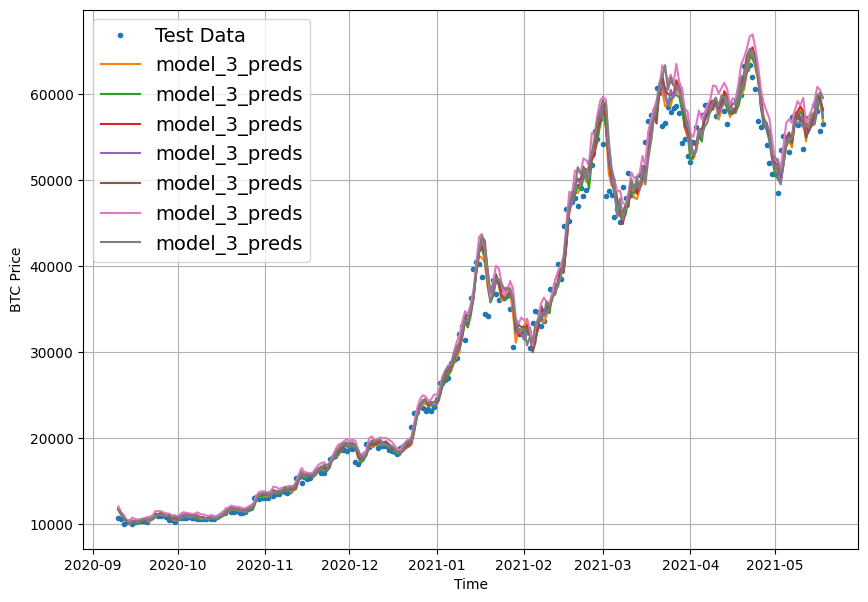

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

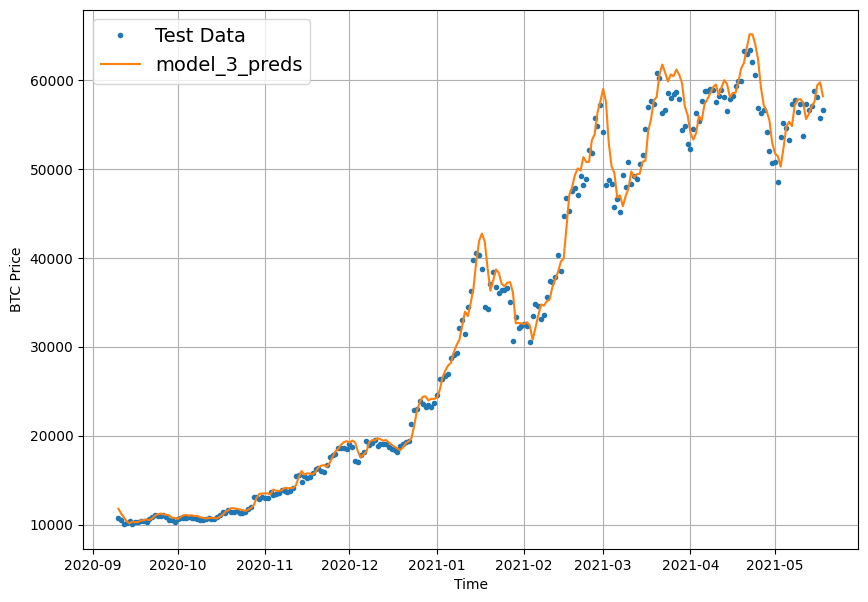

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

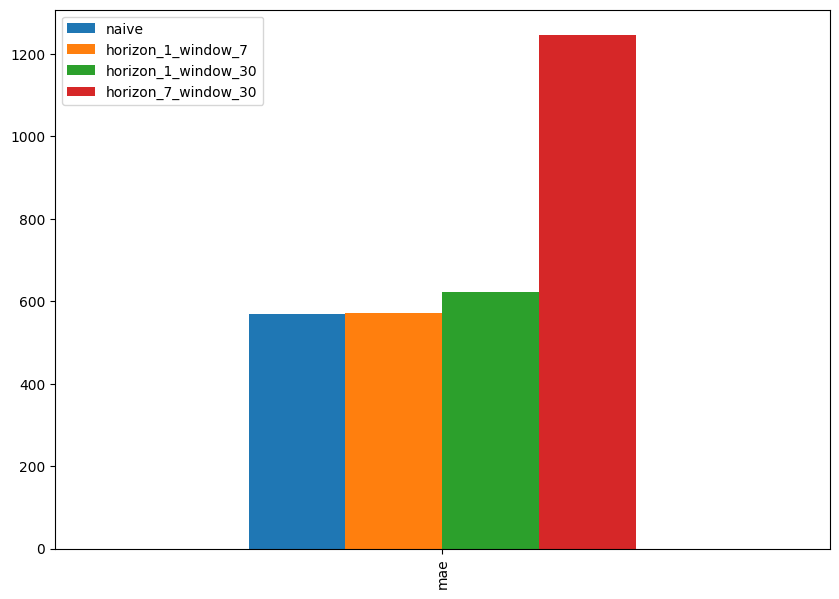

In [69]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [70]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [71]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [72]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [73]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [74]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [75]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [76]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [77]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1746.2367

18/18 [==============================] - 3s 53ms/step - loss: 1746.2367 - val_loss: 2700.0562
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 295.2354

18/18 [==============================] - 1s 39ms/step - loss: 295.2354 - val_loss: 1178.8682
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 215.6446

18/18 [==============================] - 1s 58ms/step - loss: 213.5473 - val_loss: 1079.2372
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 195.4474

18/18 [==============================] - 1s 53ms/step - loss: 193.6357 - val_loss: 1065.7161
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 196.5845

18/18 [==============================] - 1s 60ms/step - loss: 189.5315 - val_loss: 1059.6156
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 185.3460

18/18 [==============================] - 1s 50ms/step - loss: 189.1700 - val_loss: 1049.9840
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 195.3392

18/18 [==============================] - 1s 44ms/step - loss: 187.9702 - val_loss: 1028.1775
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 178.6575

18/18 [==============================] - 1s 39ms/step - loss: 182.1496 - val_loss: 1018.9014
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 179.9626 - val_loss: 1029.6002
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 177.3422

18/18 [==============================] - 1s 40ms/step - loss: 177.3422 - val_loss: 1005.1757
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 175.1687

18/18 [==============================] - 1s 41ms/step - loss: 175.1687 - val_loss: 973.0229
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 174.9870

18/18 [==============================] - 1s 39ms/step - loss: 174.9870 - val_loss: 972.1533
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 170.3131 - val_loss: 997.5266
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 164.4029

18/18 [==============================] - 1s 41ms/step - loss: 167.1682 - val_loss: 968.8226
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 166.5328

18/18 [==============================] - 1s 40ms/step - loss: 166.3789 - val_loss: 934.4324
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 161.4078

18/18 [==============================] - 1s 41ms/step - loss: 161.4078 - val_loss: 916.1855
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 159.2104 - val_loss: 923.7681
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 162.8593

18/18 [==============================] - 1s 59ms/step - loss: 157.1127 - val_loss: 902.8931
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 153.3916 - val_loss: 912.9578
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 152.8969

18/18 [==============================] - 1s 40ms/step - loss: 152.8969 - val_loss: 852.0692
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 150.1164

18/18 [==============================] - 1s 41ms/step - loss: 150.1164 - val_loss: 832.3792
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 147.2962 - val_loss: 843.6303
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 144.9870 - val_loss: 844.3466
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 142.5443

18/18 [==============================] - 1s 41ms/step - loss: 142.5443 - val_loss: 798.8845
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 140.3170

18/18 [==============================] - 1s 50ms/step - loss: 140.3170 - val_loss: 786.1797
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 135.0511

18/18 [==============================] - 1s 58ms/step - loss: 138.2286 - val_loss: 762.9093
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 141.8260

18/18 [==============================] - 1s 52ms/step - loss: 137.2226 - val_loss: 752.7022
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3830

18/18 [==============================] - 1s 39ms/step - loss: 133.9225 - val_loss: 742.5718
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 134.2370

18/18 [==============================] - 1s 42ms/step - loss: 132.9585 - val_loss: 732.1827
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 133.3276 - val_loss: 862.6330
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 139.0784 - val_loss: 767.1407
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 132.0306

18/18 [==============================] - 1s 40ms/step - loss: 132.0306 - val_loss: 725.4590
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 130.1753

18/18 [==============================] - 1s 40ms/step - loss: 129.3814 - val_loss: 710.7081
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 125.5609

18/18 [==============================] - 1s 40ms/step - loss: 126.2825 - val_loss: 698.2131
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2131

18/18 [==============================] - 1s 60ms/step - loss: 125.1431 - val_loss: 697.7772
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 126.9877 - val_loss: 724.1854
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 158.4684

18/18 [==============================] - 1s 41ms/step - loss: 124.0915 - val_loss: 673.9757
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 123.0279

18/18 [==============================] - 1s 41ms/step - loss: 122.8095 - val_loss: 667.0339
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 124.4258 - val_loss: 727.6492
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 122.3325

18/18 [==============================] - 1s 41ms/step - loss: 122.3325 - val_loss: 656.9204
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 120.7843

18/18 [==============================] - 1s 40ms/step - loss: 120.7843 - val_loss: 651.4827
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 121.5299 - val_loss: 657.0590
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 119.3673

18/18 [==============================] - 1s 40ms/step - loss: 119.3673 - val_loss: 643.5593
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8759 - val_loss: 649.2081
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 119.4184

18/18 [==============================] - 1s 40ms/step - loss: 119.4184 - val_loss: 637.0881
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 117.8313

18/18 [==============================] - 1s 48ms/step - loss: 118.5377 - val_loss: 632.0007
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 123.8123 - val_loss: 690.3284
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 120.8912 - val_loss: 728.0731
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1064 - val_loss: 637.8669
Epoch 50/100
13/18 [====================>.........] - ETA: 0s - loss: 117.5673

18/18 [==============================] - 1s 57ms/step - loss: 121.1286 - val_loss: 629.9917
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8579 - val_loss: 634.4721
Epoch 52/100
13/18 [====================>.........] - ETA: 0s - loss: 123.3913

18/18 [==============================] - 1s 46ms/step - loss: 116.2582 - val_loss: 619.3476
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3427 - val_loss: 629.4602
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1830 - val_loss: 658.1533
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 115.5378

18/18 [==============================] - 1s 40ms/step - loss: 115.5378 - val_loss: 609.4688
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2278 - val_loss: 757.4097
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 134.4858 - val_loss: 612.6333
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4396 - val_loss: 612.0083
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 112.7707

18/18 [==============================] - 1s 41ms/step - loss: 112.9565 - val_loss: 609.3209
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3901 - val_loss: 621.6085
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2503 - val_loss: 630.0144
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 113.1424

18/18 [==============================] - 1s 61ms/step - loss: 113.1424 - val_loss: 599.6577
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6536 - val_loss: 603.7948
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1941 - val_loss: 667.4288
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6121 - val_loss: 634.6097
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 113.1641

18/18 [==============================] - 1s 40ms/step - loss: 113.1641 - val_loss: 599.1928
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0934 - val_loss: 661.3262
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1487 - val_loss: 648.0013
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 122.7362 - val_loss: 696.0591
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 119.9879 - val_loss: 608.0866
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8889 - val_loss: 618.3515
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 110.7395

18/18 [==============================] - 1s 40ms/step - loss: 112.3646 - val_loss: 592.1580
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 110.6649

18/18 [==============================] - 1s 40ms/step - loss: 110.6649 - val_loss: 590.8828
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 111.5871

18/18 [==============================] - 1s 39ms/step - loss: 111.7205 - val_loss: 587.8842
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6616 - val_loss: 599.0215
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0191 - val_loss: 595.9350
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9841 - val_loss: 598.7617
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3770 - val_loss: 590.7053
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6193 - val_loss: 599.5750
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8500 - val_loss: 599.9922
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7815 - val_loss: 613.5688
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2470 - val_loss: 600.8686
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 40ms/step - loss: 112.8019 - val_loss: 581.4077
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8798 - val_loss: 608.5275
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4774 - val_loss: 645.9783
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3941 - val_loss: 600.7461
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4903 - val_loss: 584.8140
Epoch 89/100
18/18 [==============================] - ETA: 0s - loss: 110.2171

18/18 [==============================] - 1s 40ms/step - loss: 110.2171 - val_loss: 578.0632
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0833 - val_loss: 691.6867
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3150 - val_loss: 578.3151
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4363 - val_loss: 622.5565
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2251 - val_loss: 598.8975
Epoch 94/100
13/18 [====================>.........] - ETA: 0s - loss: 107.7349

18/18 [==============================] - 1s 57ms/step - loss: 109.0779 - val_loss: 576.9814
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6219 - val_loss: 584.1349
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 109.0166 - val_loss: 578.0090
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3725 - val_loss: 604.3112
Epoch 98/100
12/18 [===================>..........] - ETA: 0s - loss: 112.0960

18/18 [==============================] - 1s 45ms/step - loss: 109.7266 - val_loss: 574.3526
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 108.9336

18/18 [==============================] - 1s 39ms/step - loss: 108.9336 - val_loss: 573.2924
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0481 - val_loss: 587.8127


In [78]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 587.8126


587.8126220703125

In [80]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 573.2925


573.29248046875

In [81]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [82]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 2ms/step


((556, 1), TensorShape([556]))

In [83]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 573.2924,
 'mse': 1194298.0,
 'rmse': 1092.8395,
 'mape': 2.5667114,
 'mase': 1.007116}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [84]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [85]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 144ms/step - loss: 2878.4204 - val_loss: 13482.5850
Epoch 2/100
18/18 [==============================] - 3s 188ms/step - loss: 1203.1013 - val_loss: 1802.6263
Epoch 3/100
18/18 [==============================] - 2s 104ms/step - loss: 275.9839 - val_loss: 1081.3901
Epoch 4/100
18/18 [==============================] - 2s 101ms/step - loss: 210.8478 - val_loss: 1080.7452
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 197.4467 - val_loss: 1129.1830
Epoch 6/100
18/18 [==============================] - 2s 125ms/step - loss: 192.3736 - val_loss: 1071.0471
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 189.3369 - val_loss: 1077.4998
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 187.0293 - val_loss: 1077.9752
Epoch 9/100
18/18 [==============================] - 2s 106ms/step - loss: 183.4843 - val_loss: 982.2039
Epoch 10/100
18/18 [==============================

In [86]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 592.7974


592.7974243164062

In [87]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [88]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 592.7974,
 'mse': 1253382.5,
 'rmse': 1119.5457,
 'mape': 2.6724186,
 'mase': 1.0413809}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [89]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [90]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [91]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [92]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [93]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [94]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [95]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [96]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [98]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

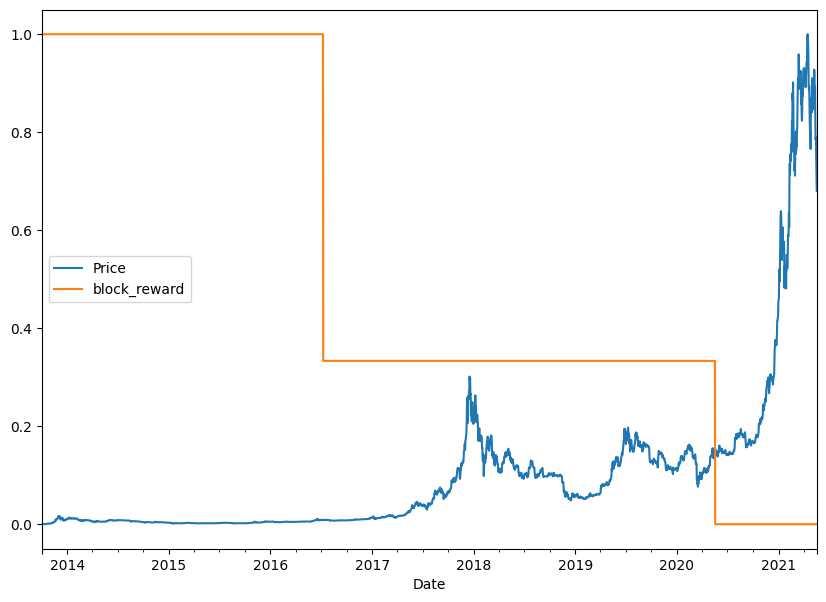

In [99]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [100]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [101]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe. Yani mesela 2013-10-08	bu tarihteki price+1 den başlayıp price+7 ye kadar olan valuelar bizim bildiğimiz windowumuz train için kullandığımız datamız yani üstteki modellerde nasıl yaptıysak onun aynısı. Price columndaki değer de bizim actual horizonumuz. Yani biz window label ayırma işini aslında pandas dataframe i ile yaptık yaptıgımız baska bir sey degil.

In [102]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
# Bu işlem, "price" sütununu veri çerçevesinden kaldırır ve sonucunda "Price" sütunu olmayan yeni bir DataFrame döndürür. Bu nedenle, axis=1 kullanarak sütun bazlı bir işlem gerçekleştirilir. Eğer axis=0 olarak ayarlarsanız, satırlar üzerinde işlem yaparsınız ve belirlediğiniz satırı çıkarırsınız.
# .dropna ile DataFrame imizdeki içinde NAN olan rowların hepsini kaldırıyor.
# Price columnu ayırmamızın sebebi biz X ile windowlarımızı oluşturuyoruz. Price columnu bizim horizon değerlerimizi tutuyor.
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [103]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

# Make train/test sets using indexing

In [104]:
split_size = int(len(X) * 0.8)
X_train , y_train = X[ : split_size] , y[ : split_size]
X_test , y_test = X[ split_size: ] , y[ split_size : ]

len( X_train) , len(y_train)  , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [105]:
y_train

Date
2013-10-08     123.032997
2013-10-09     124.049004
2013-10-10     125.961159
2013-10-11     125.279663
2013-10-12     125.927498
                 ...     
2019-11-05    9369.627930
2019-11-06    9326.599609
2019-11-07    9335.751953
2019-11-08    9226.485352
2019-11-09    8794.358398
Name: Price, Length: 2224, dtype: float32

In [106]:
X_train.shape , y_train.shape

((2224, 8), (2224,))

# Model 6 : Same as model 1 but with block_reward

In [107]:
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(HORIZON)
    ] , name = "model_6_multivariate"
)
# Compile a model
model_6.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model
model_6.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = (X_test , y_test) ,
    batch_size = 128 ,
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1326.6890

18/18 [==============================] - 4s 102ms/step - loss: 1326.6890 - val_loss: 2572.8782
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 389.9760

18/18 [==============================] - 2s 145ms/step - loss: 334.7527 - val_loss: 1520.8953
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 192.0352

18/18 [==============================] - 1s 63ms/step - loss: 190.5545 - val_loss: 1131.1935
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 171.0025

18/18 [==============================] - 1s 50ms/step - loss: 170.7877 - val_loss: 917.8936
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 164.2731

18/18 [==============================] - 1s 40ms/step - loss: 159.2052 - val_loss: 868.1794
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 155.4996

18/18 [==============================] - 1s 29ms/step - loss: 155.4996 - val_loss: 842.9053
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 177.5815

18/18 [==============================] - 0s 28ms/step - loss: 149.3593 - val_loss: 821.5701
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 145.1853

18/18 [==============================] - 0s 29ms/step - loss: 146.2837 - val_loss: 794.0596
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 144.4326 - val_loss: 798.1572
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 138.6446

18/18 [==============================] - 1s 30ms/step - loss: 139.8559 - val_loss: 755.8065
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 143.9885

18/18 [==============================] - 0s 28ms/step - loss: 134.6909 - val_loss: 753.0590
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 134.1665 - val_loss: 854.2642
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 136.5761 - val_loss: 788.8204
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 140.7353

18/18 [==============================] - 1s 30ms/step - loss: 130.5090 - val_loss: 744.9472
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9800

18/18 [==============================] - 1s 30ms/step - loss: 129.8304 - val_loss: 701.5394
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5181 - val_loss: 709.7714
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 124.8483 - val_loss: 719.3591
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 138.4048

18/18 [==============================] - 2s 90ms/step - loss: 124.2787 - val_loss: 687.1974
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 122.1772 - val_loss: 728.1533
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 127.2764

18/18 [==============================] - 1s 62ms/step - loss: 121.3829 - val_loss: 670.5279
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.6432

18/18 [==============================] - 1s 40ms/step - loss: 125.9430 - val_loss: 654.5627
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 120.4114 - val_loss: 684.1641
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 122.2176 - val_loss: 672.2689
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 120.8489

18/18 [==============================] - 1s 42ms/step - loss: 119.4352 - val_loss: 640.5116
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 117.5379

18/18 [==============================] - 1s 77ms/step - loss: 117.0290 - val_loss: 633.0453
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 123.3232

18/18 [==============================] - 1s 43ms/step - loss: 119.5704 - val_loss: 625.8576
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 163.0830

18/18 [==============================] - 1s 29ms/step - loss: 118.8047 - val_loss: 621.0250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 110.2341

18/18 [==============================] - 1s 29ms/step - loss: 115.9374 - val_loss: 617.7350
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0406 - val_loss: 618.8574
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0477 - val_loss: 631.0119
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3886 - val_loss: 764.9937
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 123.5727

18/18 [==============================] - 1s 32ms/step - loss: 123.4283 - val_loss: 616.5898
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 118.5358 - val_loss: 622.5155
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 128.0562

18/18 [==============================] - 1s 31ms/step - loss: 114.5381 - val_loss: 609.1907
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 103.1569

18/18 [==============================] - 0s 28ms/step - loss: 113.1672 - val_loss: 605.2800
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3250 - val_loss: 629.5974
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2702 - val_loss: 613.0389
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9088

18/18 [==============================] - 0s 29ms/step - loss: 113.1865 - val_loss: 602.8435
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6655 - val_loss: 625.1353
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7281

18/18 [==============================] - 0s 28ms/step - loss: 111.8080 - val_loss: 593.8305
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2812 - val_loss: 616.4866
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 107.2525

18/18 [==============================] - 0s 29ms/step - loss: 116.9343 - val_loss: 591.2895
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7750 - val_loss: 629.9191
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 71.3924

18/18 [==============================] - 0s 29ms/step - loss: 113.3408 - val_loss: 589.7115
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7484 - val_loss: 594.6342
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4697 - val_loss: 596.0773
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7647 - val_loss: 689.1332
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4671 - val_loss: 648.6182
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 168.6969

18/18 [==============================] - 0s 28ms/step - loss: 119.3775 - val_loss: 585.0186
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1380 - val_loss: 610.5145
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4881 - val_loss: 596.6132
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4034 - val_loss: 599.5395
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1429 - val_loss: 619.5580
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8897 - val_loss: 669.7656
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5510 - val_loss: 599.1420
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1016 - val_loss: 745.0695
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8946 - val_loss: 638.3724
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 0s 28ms/step - loss: 109.6326 - val_loss: 582.3477
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2600 - val_loss: 582.3745
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9918 - val_loss: 613.7468
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5903 - val_loss: 619.4520
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7681 - val_loss: 587.7346
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4054

18/18 [==============================] - 0s 27ms/step - loss: 107.6753 - val_loss: 571.5034
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5205 - val_loss: 700.9788
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4413 - val_loss: 593.7301
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 122.9123 - val_loss: 614.3271
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 128.5590 - val_loss: 573.7688
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5720 - val_loss: 587.6031
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 106.6369

18/18 [==============================] - 1s 42ms/step - loss: 108.4509 - val_loss: 570.9867
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4805 - val_loss: 659.7786
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3085 - val_loss: 572.2060
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7895 - val_loss: 587.1183
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3338 - val_loss: 611.6393
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4104 - val_loss: 583.6964
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6795 - val_loss: 571.2112
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1257 - val_loss: 594.8964
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7027 - val_loss: 615.8379
Epoch 81/100
16/18 [=========================>....] - ETA: 0s - loss: 107.06

18/18 [==============================] - 1s 35ms/step - loss: 106.9642 - val_loss: 568.8467
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 192.7781

18/18 [==============================] - 0s 29ms/step - loss: 114.3083 - val_loss: 568.0979
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7309 - val_loss: 661.7316
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8865 - val_loss: 568.7975
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2654 - val_loss: 569.5542
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1214 - val_loss: 579.2831
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.9961 - val_loss: 583.5363
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9346 - val_loss: 571.9050
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6584 - val_loss: 570.7045
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.3479 - val_loss: 594.9803
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 1s 50ms/step - loss: 106.4439 - val_loss: 566.6956
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0069 - val_loss: 650.3586


In [108]:
# Load the best performing model_6
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate/")
model_6.evaluate(X_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.6956


566.695556640625

In [109]:
# Make predictions
model_6_preds = model_6.predict(X_test)
model_6_preds.shape


18/18 [==============================] - 0s 2ms/step


(556, 1)

In [110]:
y_test.shape

(556,)

In [111]:
model_6_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_6_preds)
)
model_6_results

{'mae': 566.6955,
 'mse': 1163904.9,
 'rmse': 1078.8442,
 'mape': 2.540059,
 'mase': 0.995527}

# Model 7 : N-BEATS Algorithm
Lets now try to build the biggest baddest ( though maybe not the baddest , as in , it performly very well ) time series forecasting model we have built so far.

More spesifically , we are going to replicating the algorithm in figure 1 from the paper : https://arxiv.org/pdf/1905.10437.pdf

* We will see how to use tensorflow layer subclassing ( to make our own custom layers.)
* Get experience using the functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the NBEATS block layer

Because the NBEATS block layer doesnt exist in tensorflow , we have got to create this.

To create custom layers and models in tensorflow , we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

Note : Fully connected layers means Dense layers.


In [112]:
# Create NBeatBlock custom layer. We are using subclassing because to create a layer in a network doesnt already exist in tensorflow.
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self ,
               input_size : int ,
               theta_size : int ,
               horizon : int ,
               n_neurons : int ,
               n_layers : int ,
               **kwargs   # the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape , trainable , name )(bütün default valueları biz girmemiş olsak bile **kwargs ile onları da default olarak eklemiş oluyoruz.)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size   # If you want to initialize some variables in class , you should use self.variable_name = something.
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons , activation = "relu") for _ in range(n_layers)]  # We will put 4 for n_layers later.

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation = "linear" , name = "theta")

    # Now we will describe our data how to go from the inputs to outputs with call method. (call method layer olustururken her zaman zorunlu)
  def call(self , inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)   # x will get updated contiunally as it passes through each layer in the fully connected stack.
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast , forecast = theta[ : , : self.input_size ] , theta[ : , -self.horizon : ]
    return backcast , forecast    # It is trying to use the backcast to improve its forecast positions.
    # backcast, theta'nın başlangıcından input_size boyutuna kadar olan bölümünü temsil eder. Bu, geçmiş zaman adımlarına ilişkin tahminlemeyi içerir.
    # forecast, theta'nın sonundan -horizon boyutuna kadar olan bölümünü temsil eder. Bu, gelecekteki zaman adımlarına ilişkin tahminlemeyi içerir.





Lets test our NBeatsBlock class

To do , we will make some dummy inputs and outputs



In [113]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE ,
    theta_size = WINDOW_SIZE + HORIZON , # Because our theta includes backcast and forecast , backcast acts like our input and forecast acts like our output, so we should use WINDOW_SIZE + HORIZON
    horizon = HORIZON ,
    n_neurons = 128 ,
    n_layers = 4
)

In [114]:
# Create a dummy inputs (have to be same shape with input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,  axis = 0)  #  Dense layers should have (batch_size , input_dim) shape , so it would be 2D input with shape  (batch_size , input_dim)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [115]:
# Pass dummy inputs to dummy NBeatsBlock
backcast , forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")

Backcast : [-0.81231046 -0.74567723  0.59952676 -0.28102726  1.0267019   0.95847785
  0.40375316]
Forecast : 0.007551804184913635


### Preparing data for the N-BEATS algorithm using 'tf.data' for faster training.

In [116]:
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# Create N-BEATS data inputs ( N-BEATS works with univariate time series )
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [118]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [119]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [120]:
# Time to make our dataset performant using tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset ,train_labels_dataset ))
test_dataset = tf.data.Dataset.zip((test_features_dataset ,test_labels_dataset ))

In [121]:
train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters , we will tune our parameters using our paper , Table 18

We are using N-BEATS G(generic) algorithm and also we are going to use Daily forecast (Dly)

In [122]:
# Values from N-BEATS papers.
N_EPOCHS = 5000 # In paper , they say iterations for epochs.
N_NEURONS = 512 # In paper , they say Width
N_LAYERS = 4 # Our block network has 4 fully connected layers.
N_STACKS = 30 # Our algorihtm needs 30 stacks (written in paper)

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

 Bizim modelimiz çok deep oldugunda (yani cok fazla hidden layer icerdiginde) output layera yaklasırken artık weightsler aşırı küçük oluyor ve bunlar küçük değerlerinden dolayı kaybolabiliyor(artık modelimiz untrainable hale geliyor bu sebepten dolayı). Biz bunu istemiyoruz. Bu yüzden residual neural network kullanıyoruz. Bu bize eğerki weightslerimiz çok küçüldüyse ve kaybolacaksa son hidden layerları atlayıp direkt output layera gelmesini sağlıyor.

## Getting ready for residual connections

Before we can craft our N-BEAST model , we need two layers for the residual connections(add and subtract)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 in paper)

https://paperswithcode.com/method/resnet

In [123]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1 , tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [124]:
# Subtract
subtracted = tf.keras.layers.subtract( [ tensor_1 , tensor_2 ] )

# Add
added = tf.keras.layers.add( [ tensor_1 , tensor_2 ] )

subtracted.numpy() , added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

### Building , compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS Block layer using ' NBeatsBlock' (this will be the initial block used for the network , the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack ( we will be using the keras functional API)
3. Make the initial backcast and forecasts for the model with the layer created in step 1
4. Use for loop to create stacks of block layers
5. Use the ' NBeatsBlock ' class within the for loop in step 4 to create blocks which return backcasts and block level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together with tf.keras.Model().
8. Compile the model with MAE loss and Adam optimizer with default settings.
9. Fit the N-BEAST model for 5000 epochs and since it's fitting for so many epochs , we will use a couple of callbacks :  
  * Early Stopping - Because the model will be training for so long , we will stop it early if it stops improving.
  * Reduce Learning Rate on Plateau - If model stops improving , try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).


In [127]:
%%time

tf.random.set_seed(42)

# Step 1: Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(
    input_size = INPUT_SIZE ,
    theta_size = THETA_SIZE ,
    horizon = HORIZON ,
    n_neurons = N_NEURONS ,
    n_layers = N_LAYERS ,
    name = "InitialBlock"
)

# Step 2 : Create an input layer to stacks
stack_input = tf.keras.layers.Input( shape = (INPUT_SIZE)  , name = "stack_input")

# Step 3 : Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals , forecast = nbeats_block_layer(stack_input)  # Residuals burda backcast döndürüyor.

# Step 4 : Create stacks of block layers.
for i , _ in enumerate(range(N_STACKS - 1)):  # -1 yapmamızın sebebi biz toplam 30 stack istiyoruz fakat bizim ilk stack layerımız nbeats_block_layer(stack_input) burdan zaten geliyor o yüzden bunu çıkarmış oluyoruz -1 ile.
  # Step 5 : Use the NBeastBlock to calculate the backcast as well as the forecast
  backcast , block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE ,
      theta_size = THETA_SIZE ,
      horizon = HORIZON ,
      n_neurons = N_NEURONS ,
      n_layers = N_LAYERS ,
      name = f"NBeatBlock_{i}"
  )(residuals)  # Pass in the residuals.

  # Step 6 : Create the double residual stacking
  residuals = tf.keras.layers.subtract( [ residuals , backcast ]  , name = f"Subtract_{i}")
  forecast = layers.add( [ forecast , block_forecast ] , name = f"Add_{i}" )

# Step 7 : Put the stack model together
model_7 = tf.keras.Model( stack_input , forecast , name = "model_7_NBEATS")

# Step 8 : Compile a model
model_7.compile( loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                 )
# Step 9 : Fit the model
model_7.fit(
    train_dataset ,
    epochs = N_EPOCHS ,
    validation_data = test_dataset ,
    callbacks = [ tf.keras.callbacks.EarlyStopping(monitor = "val_loss" ,
                                                   patience = 200 , # If our model doesnt improve for 200 epochs , it's going to restore its best weights and stop training.
                                                   restore_best_weights = True
                                                   )  ,
                  tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss" ,
                                                       patience = 100 , # If our model doesnt improve for 100 epochs , it's going to reduce our learning rate with 0.1 * (our learning rate)
                                                       verbose = 1
                                                       )
                  ]

)

Epoch 1/5000
3/3 [==============================] - 55s 918ms/step - loss: 2296.7112 - val_loss: 11177.8584 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 140ms/step - loss: 4631.8799 - val_loss: 8238.2900 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 65ms/step - loss: 2402.9883 - val_loss: 16033.5791 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 146ms/step - loss: 2288.1614 - val_loss: 6705.5986 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 61ms/step - loss: 414.8190 - val_loss: 8264.4404 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 140ms/step - loss: 2512.2834 - val_loss: 4659.2480 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 95ms/step - loss: 1597.9712 - val_loss: 9793.7559 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 89ms/step - loss: 1508.1610 - val_loss: 6853.6875 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] 

In [128]:
# Evaluate our N-BEATS model
model_7.evaluate(test_dataset)


1/1 [==============================] - 0s 44ms/step - loss: 577.5898


577.58984375

In [129]:
# Make predictions with our model
model_7_preds = model_7.predict(test_dataset)
model_7_preds


1/1 [==============================] - 3s 3s/step


array([[ 8850.128 ],
       [ 8788.635 ],
       [ 9032.409 ],
       [ 8767.217 ],
       [ 8749.268 ],
       [ 8735.547 ],
       [ 8663.511 ],
       [ 8499.417 ],
       [ 8477.788 ],
       [ 8512.356 ],
       [ 8249.468 ],
       [ 8133.847 ],
       [ 8079.0244],
       [ 7698.717 ],
       [ 7319.1426],
       [ 7311.2324],
       [ 7115.801 ],
       [ 7221.278 ],
       [ 7161.1445],
       [ 7475.0483],
       [ 7396.3745],
       [ 7735.234 ],
       [ 7578.7993],
       [ 7406.348 ],
       [ 7307.5024],
       [ 7318.0503],
       [ 7215.064 ],
       [ 7370.6416],
       [ 7481.81  ],
       [ 7532.551 ],
       [ 7543.5073],
       [ 7353.4814],
       [ 7235.388 ],
       [ 7191.8125],
       [ 7192.6123],
       [ 7225.8086],
       [ 7107.989 ],
       [ 7102.032 ],
       [ 6908.282 ],
       [ 6638.912 ],
       [ 7302.266 ],
       [ 7176.2393],
       [ 7143.143 ],
       [ 7243.2104],
       [ 7271.657 ],
       [ 7147.3457],
       [ 7213.7217],
       [ 7203

In [130]:
y_test.shape

(556,)

In [131]:
model_7_preds.shape

(556, 1)

In [132]:
# Evaluate model_7_preds
model_7_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_7_preds)
)
model_7_results

{'mae': 577.58984,
 'mse': 1172713.8,
 'rmse': 1082.9191,
 'mape': 2.6522582,
 'mase': 1.0146654}

### Plot the N-BEATS architecture

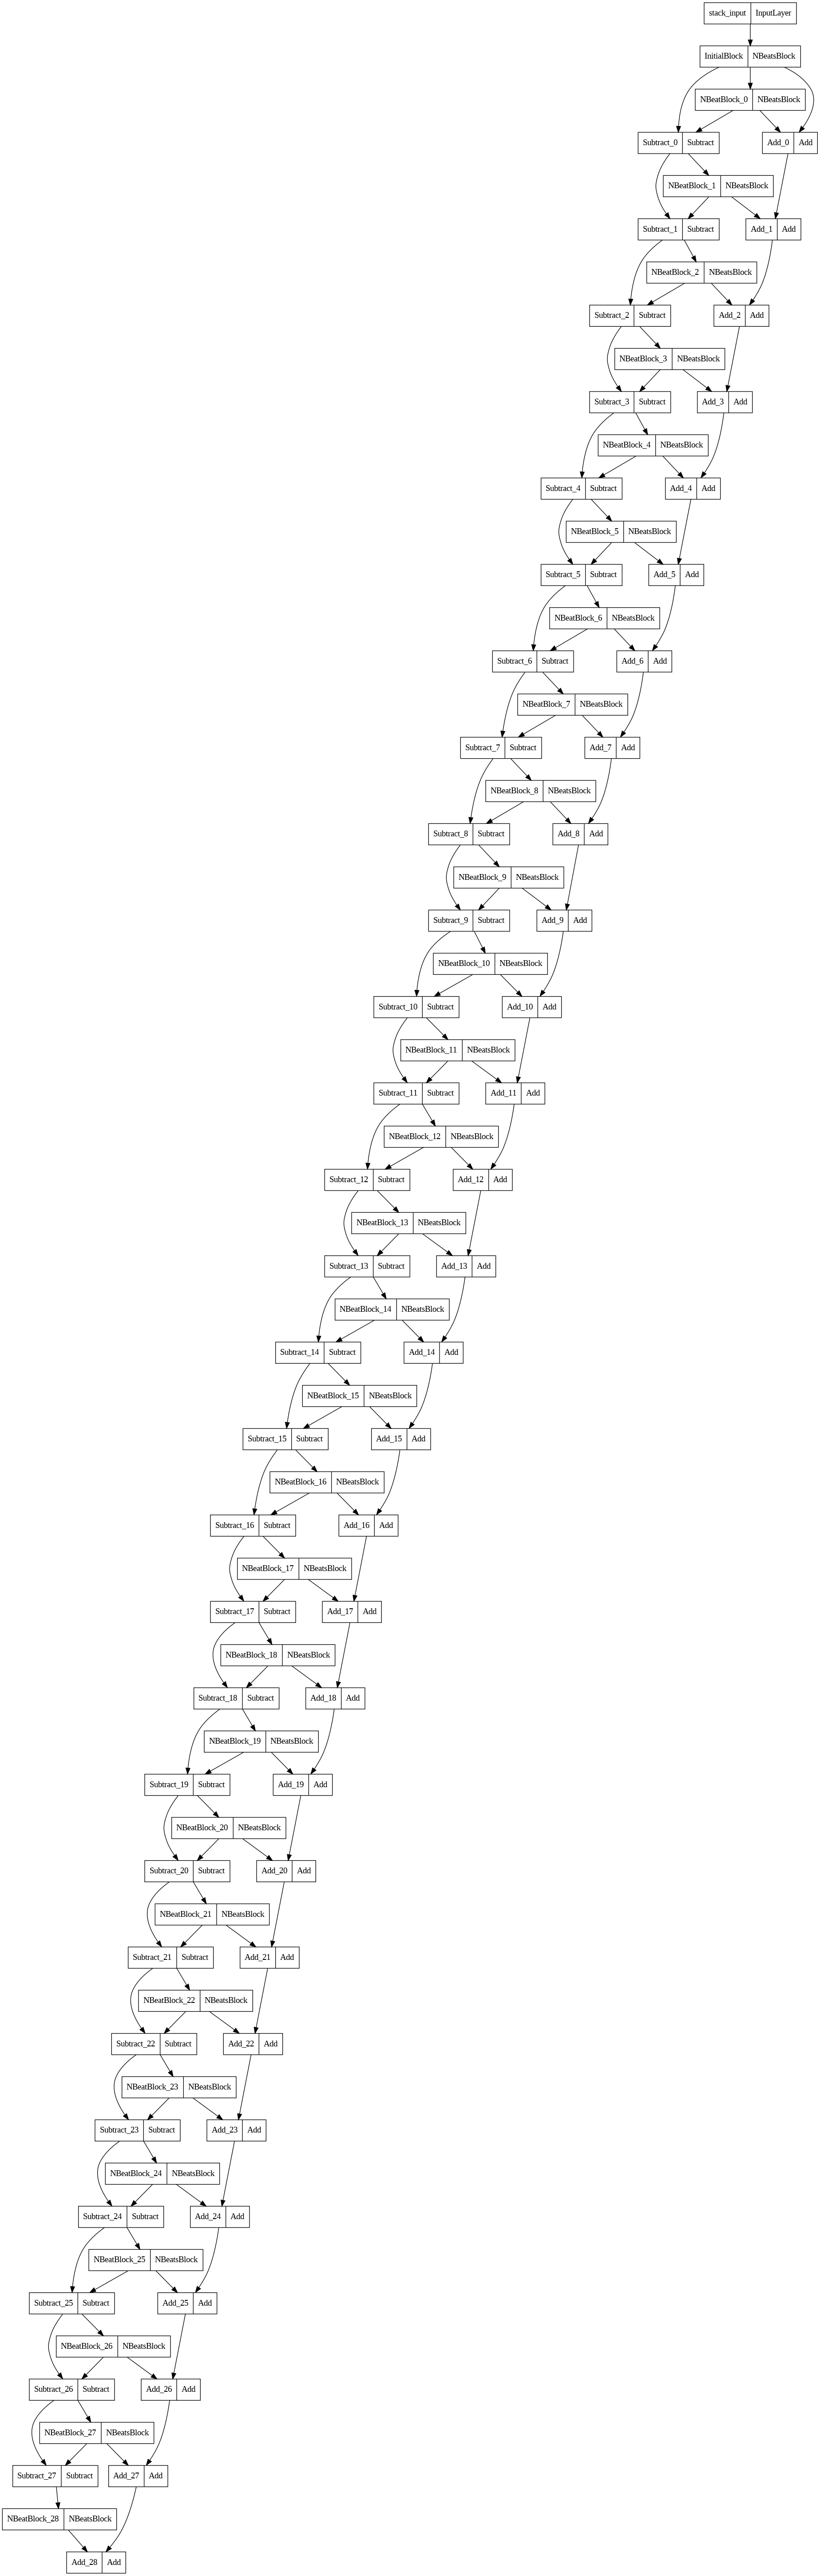

In [133]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8 : Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect(kalabalıgın bilgeligi).

It combines many different models to predict a common goal.

In [134]:
HORIZON , WINDOW_SIZE

(1, 7)

## Constructing and fitting and ensemble of models (using different loss functions)

Ensemble yaparken farklı modellere bakarken aynı zamanda bütün modellerin weightsleri de farklı farklı başlıyor en başta. Bu yüzden bu bize çok büyük bir avantaj sağlıyor.

In [150]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # It means how many different models that we are going to train.
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
       # Initialize dense layers with normal distribution for estimating prediction intervals later on. ("he_normal" is for normal distribution) (Kernel initialization aslında ilk başta weightslerimizi random geliyor o random gelen weightsleri neye göre ayarlıcaz onu belirliyor.)
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [151]:
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(
    num_iter = 5 ,
    num_epochs = 1000
)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 799: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 899: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 348: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 448: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 166: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 469: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 569: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 438: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 557: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 657:

In [152]:
len(ensemble_models)

15